## Support Vector Machine on Titanic Dataset
#
#### We try to predict with svm if the passenger of the Titanic boat will survive or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
df = pd.read_csv('../train.csv', header=0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1- Data Preprocessing 

In [3]:
new_df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
new_df['Age'].fillna(int(df['Age'].mean()), inplace=True)
new_df['Sex'] = new_df['Sex'].apply(lambda x : ['male', 'female'].index(x))
new_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = pd.get_dummies(new_df['Embarked'], dtype=int)
new_df = new_df.drop(['Embarked'], axis=1)
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,1,29.0,1,2,23.4500,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(new_df.loc[:,new_df.columns!='Survived'], new_df['Survived'], test_size=0.8)

In [5]:
clf = svm.SVC()

In [6]:
clf.fit(X_train, y_train)

SVC()

In [7]:
y_pred = clf.predict(X_test)

In [10]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.67      0.93      0.78       441\n           1       0.69      0.26      0.38       272\n\n    accuracy                           0.67       713\n   macro avg       0.68      0.59      0.58       713\nweighted avg       0.68      0.67      0.62       713\n'

In [8]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6732117812061711

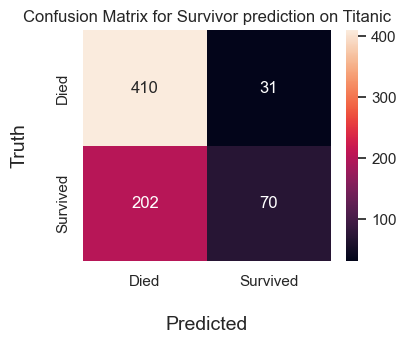

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

plt.figure(figsize=(4,3), dpi=100)
sns.set(font_scale=1)

ax = sns.heatmap(conf_matrix, annot=True, fmt='d')
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Died', 'Survived'])

ax.set_ylabel("Truth", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Died', 'Survived'])

ax.set_title("Confusion Matrix for Survivor prediction on Titanic")

plt.show()